In [247]:
import pandas as pd
import os

In [248]:
working_dir= os.getcwd()

data_path = working_dir+'/Data_Set.csv'

In [249]:
df1 = pd.read_csv(data_path)
df1.head(10)

,Name of the data = Home Consumption,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,Unit = kW and $/kW,NaN,NaN,NaN,NaN,NaN
1,Time,E_Plug,E_Heat,Price,Temperature,No. Occupants
2,1,24,28,10,-15,12
3,2,17,32,12,-17,12
4,3,16,34,11,-19,12
5,3,16,34,11,-19,12
6,4,16,33,12,-18,12
7,5,16,30,10,-14,12
8,6,16,31,10,-16,12
9,7,19,28,14,-14,12


In [250]:
# Python skips the first 2 rows
df2 = pd.read_csv(data_path, header= 2)
df2.head(10)

,Time,E_Plug,E_Heat,Price,Temperature,No. Occupants
0,1,24.0,28,10,-15,12
1,2,17.0,32,12,-17,12
2,3,16.0,34,11,-19,12
3,3,16.0,34,11,-19,12
4,4,16.0,33,12,-18,12
5,5,16.0,30,10,-14,12
6,6,16.0,31,10,-16,12
7,7,19.0,28,14,-14,12
8,8,22.0,29,12,-15,9
9,9,25.0,26,12,-12,8


In [251]:
df2.shape

(25, 6)

In [252]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Time           25 non-null     int64  
 1   E_Plug         24 non-null     float64
 2   E_Heat         25 non-null     int64  
 3   Price          25 non-null     object 
 4   Temperature    25 non-null     int64  
 5   No. Occupants  25 non-null     int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 1.3+ KB


In [253]:
# Rename one feature of the dataframe
df3 = df2.rename(columns = {"Temperature":"Temp"})
df3.head(10)

,Time,E_Plug,E_Heat,Price,Temp,No. Occupants
0,1,24.0,28,10,-15,12
1,2,17.0,32,12,-17,12
2,3,16.0,34,11,-19,12
3,3,16.0,34,11,-19,12
4,4,16.0,33,12,-18,12
5,5,16.0,30,10,-14,12
6,6,16.0,31,10,-16,12
7,7,19.0,28,14,-14,12
8,8,22.0,29,12,-15,9
9,9,25.0,26,12,-12,8


In [254]:
# Dropping some data
# axis = 0-> rows, axis = 1 -> columns
df4 = df3.drop('No. Occupants', axis=1)
df4.head(10)

,Time,E_Plug,E_Heat,Price,Temp
0,1,24.0,28,10,-15
1,2,17.0,32,12,-17
2,3,16.0,34,11,-19
3,3,16.0,34,11,-19
4,4,16.0,33,12,-18
5,5,16.0,30,10,-14
6,6,16.0,31,10,-16
7,7,19.0,28,14,-14
8,8,22.0,29,12,-15
9,9,25.0,26,12,-12


In [255]:
# inplace=True -> means implements this change into df3 itself
df3.drop('No. Occupants', axis=1, inplace=True)
df3.head()

,Time,E_Plug,E_Heat,Price,Temp
0,1,24.0,28,10,-15
1,2,17.0,32,12,-17
2,3,16.0,34,11,-19
3,3,16.0,34,11,-19
4,4,16.0,33,12,-18


In [256]:
# Removing a row because is duplicated
df5 = df4.drop(2, axis = 0)
df5.head(10)

,Time,E_Plug,E_Heat,Price,Temp
0,1,24.0,28,10,-15
1,2,17.0,32,12,-17
3,3,16.0,34,11,-19
4,4,16.0,33,12,-18
5,5,16.0,30,10,-14
6,6,16.0,31,10,-16
7,7,19.0,28,14,-14
8,8,22.0,29,12,-15
9,9,25.0,26,12,-12
10,10,26.0,24,14,-8


In [257]:
df5.shape

(24, 5)

In [258]:
# resetting the index
# drop=True -> drop the previous index
df6 = df5.reset_index(drop=True)
df6.head()

,Time,E_Plug,E_Heat,Price,Temp
0,1,24.0,28,10,-15
1,2,17.0,32,12,-17
2,3,16.0,34,11,-19
3,4,16.0,33,12,-18
4,5,16.0,30,10,-14


### Statistics data 

In [259]:
# .describe() -> gives dataframe statistics
df6.describe()

,Time,E_Plug,E_Heat,Temp
count,24.000000,23.000000,24.000000,24.000000
mean,12.500000,31.521739,25.666667,-10.250000
std,7.071068,21.336843,9.262672,7.968689
min,1.000000,16.000000,-4.000000,-22.000000
25%,6.750000,20.500000,19.750000,-16.250000
50%,12.500000,27.000000,28.500000,-13.000000
75%,18.250000,34.500000,32.000000,-3.000000
max,24.000000,120.000000,36.000000,3.000000


What is unusual in data? missing data on E_Plug and - values for E_Heat

In [260]:
# Locate a datapoint
# Getting the min value
Min_item = df6['E_Heat'].min()
Min_item

-4

In [261]:
# Give me the row that has the min value in the E_Heat column
# [selecting E_Heat column][give the items or values that is = to Min_item]
df6['E_Heat'][df6['E_Heat'] == Min_item]

16   -4
Name: E_Heat, dtype: int64

In [262]:
df6.head(20)

,Time,E_Plug,E_Heat,Price,Temp
0,1,24.0,28,10,-15
1,2,17.0,32,12,-17
2,3,16.0,34,11,-19
3,4,16.0,33,12,-18
4,5,16.0,30,10,-14
5,6,16.0,31,10,-16
6,7,19.0,28,14,-14
7,8,22.0,29,12,-15
8,9,25.0,26,12,-12
9,10,26.0,24,14,-8


In [263]:
# Replace abnormality
# .replace(value to replace, replacement)
df6['E_Heat'].replace(-4, 21, inplace=True)

In [264]:
df6.head(20)

,Time,E_Plug,E_Heat,Price,Temp
0,1,24.0,28,10,-15
1,2,17.0,32,12,-17
2,3,16.0,34,11,-19
3,4,16.0,33,12,-18
4,5,16.0,30,10,-14
5,6,16.0,31,10,-16
6,7,19.0,28,14,-14
7,8,22.0,29,12,-15
8,9,25.0,26,12,-12
9,10,26.0,24,14,-8


#### Covariance

In [265]:
df6.cov()

/var/folders/fk/fbj1ksls7wq3z6dyxsdrrz9w0000gn/T/ipykernel_68362/2921722195.py:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df6.cov()


,Time,E_Plug,E_Heat,Temp
Time,50.000000,88.535573,-0.500000,8.217391
E_Plug,88.535573,455.260870,25.833992,0.154150
E_Heat,-0.500000,25.833992,47.346014,-51.206522
Temp,8.217391,0.154150,-51.206522,63.500000


In [266]:
# Visualize the former matrix
import seaborn as sns

/var/folders/fk/fbj1ksls7wq3z6dyxsdrrz9w0000gn/T/ipykernel_68362/1964094976.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df6.corr())


<AxesSubplot: >

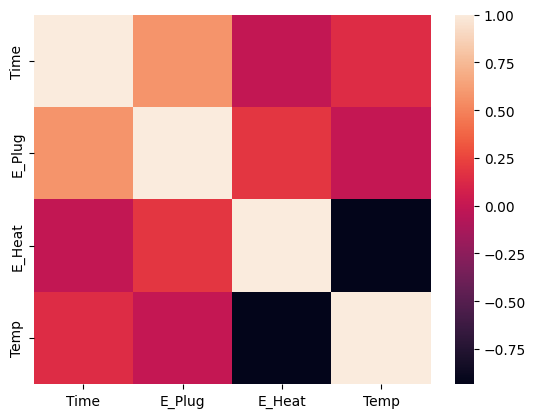

In [267]:
sns.heatmap(df6.corr())

Diagonal gives the correlation between each var with themselves -> NOT USEFUL

- Every time the Temp is down, the Elec_Heat is going up
- When Time is going up, E_Plug also grows but not too much (NOT strong corr)

### Missing values

#### Changing NaN into real NaN

In [268]:
df6.head(25)

,Time,E_Plug,E_Heat,Price,Temp
0,1,24.0,28,10,-15
1,2,17.0,32,12,-17
2,3,16.0,34,11,-19
3,4,16.0,33,12,-18
4,5,16.0,30,10,-14
5,6,16.0,31,10,-16
6,7,19.0,28,14,-14
7,8,22.0,29,12,-15
8,9,25.0,26,12,-12
9,10,26.0,24,14,-8


In [269]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    24 non-null     int64  
 1   E_Plug  23 non-null     float64
 2   E_Heat  24 non-null     int64  
 3   Price   24 non-null     object 
 4   Temp    24 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.1+ KB


In [270]:
import numpy as np

In [271]:
df7 = df6.replace('!', np.NaN)

In [272]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    24 non-null     int64  
 1   E_Plug  23 non-null     float64
 2   E_Heat  24 non-null     int64  
 3   Price   23 non-null     object 
 4   Temp    24 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.1+ KB


In [273]:
df7.head(25)

,Time,E_Plug,E_Heat,Price,Temp
0,1,24.0,28,10,-15
1,2,17.0,32,12,-17
2,3,16.0,34,11,-19
3,4,16.0,33,12,-18
4,5,16.0,30,10,-14
5,6,16.0,31,10,-16
6,7,19.0,28,14,-14
7,8,22.0,29,12,-15
8,9,25.0,26,12,-12
9,10,26.0,24,14,-8


In [274]:
df7.dtypes

Time        int64
E_Plug    float64
E_Heat      int64
Price      object
Temp        int64
dtype: object

The idea is to find the values that are NaN & replace them to NaN

Change categorical data to numerica because NaN change column to categorical

In [275]:
df7 = df7.apply(pd.to_numeric)
df7.dtypes

Time        int64
E_Plug    float64
E_Heat      int64
Price     float64
Temp        int64
dtype: object

#### Filling NaN values

In [276]:
df7.isnull()

,Time,E_Plug,E_Heat,Price,Temp
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


In [277]:
df7.isnull().sum()

Time      0
E_Plug    1
E_Heat    0
Price     1
Temp      0
dtype: int64

1. Drop the whole row using method `drop`
2. Drop all NaN at once using `dropna`
3. Not to deleting the whole row, replacing the value with other values (use a value that I want or use a previus value), using `fillna`
4. Replacing the missing value with mean or median values

In [278]:
# First method
df7.drop(13, axis=0, inplace=True)

In [279]:
df7.isnull().sum()

Time      0
E_Plug    0
E_Heat    0
Price     1
Temp      0
dtype: int64

In [280]:
# Second method
df7.dropna(axis=0, inplace=True)

In [281]:
df7.isnull().sum()

Time      0
E_Plug    0
E_Heat    0
Price     0
Temp      0
dtype: int64

In [282]:
# Thrid Method
df7 = df6.replace('!', np.NaN)
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    24 non-null     int64  
 1   E_Plug  23 non-null     float64
 2   E_Heat  24 non-null     int64  
 3   Price   23 non-null     object 
 4   Temp    24 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.1+ KB


In [283]:
df7 = df7.apply(pd.to_numeric)
df7.dtypes

Time        int64
E_Plug    float64
E_Heat      int64
Price     float64
Temp        int64
dtype: object

In [284]:
# method = 'ffill' -> uses the previous observation to fill the null cell
# method = 'bfill' -> uses the next observation to fill the null cell
df8 = df7.fillna(method='ffill')

In [285]:
df8.head(25)

,Time,E_Plug,E_Heat,Price,Temp
0,1,24.0,28,10.0,-15
1,2,17.0,32,12.0,-17
2,3,16.0,34,11.0,-19
3,4,16.0,33,12.0,-18
4,5,16.0,30,10.0,-14
5,6,16.0,31,10.0,-16
6,7,19.0,28,14.0,-14
7,8,22.0,29,12.0,-15
8,9,25.0,26,12.0,-12
9,10,26.0,24,14.0,-8


In [286]:
# Fourth method
from sklearn.impute import SimpleImputer

In [287]:
df7.head(25)

,Time,E_Plug,E_Heat,Price,Temp
0,1,24.0,28,10.0,-15
1,2,17.0,32,12.0,-17
2,3,16.0,34,11.0,-19
3,4,16.0,33,12.0,-18
4,5,16.0,30,10.0,-14
5,6,16.0,31,10.0,-16
6,7,19.0,28,14.0,-14
7,8,22.0,29,12.0,-15
8,9,25.0,26,12.0,-12
9,10,26.0,24,14.0,-8


In [288]:
headers = df7.columns

In [289]:
M_var = SimpleImputer(missing_values=np.nan, strategy= 'mean')

In [290]:
# Fit on dataset
M_var.fit(df7)

SimpleImputer()

In [291]:
# Transform to a new dataset
df9 = M_var.transform(df7)

In [292]:
df9.dtype

dtype('float64')

In [293]:
df9

array([[  1.        ,  24.        ,  28.        ,  10.        ,
        -15.        ],
       [  2.        ,  17.        ,  32.        ,  12.        ,
        -17.        ],
       [  3.        ,  16.        ,  34.        ,  11.        ,
        -19.        ],
       [  4.        ,  16.        ,  33.        ,  12.        ,
        -18.        ],
       [  5.        ,  16.        ,  30.        ,  10.        ,
        -14.        ],
       [  6.        ,  16.        ,  31.        ,  10.        ,
        -16.        ],
       [  7.        ,  19.        ,  28.        ,  14.        ,
        -14.        ],
       [  8.        ,  22.        ,  29.        ,  12.        ,
        -15.        ],
       [  9.        ,  25.        ,  26.        ,  12.        ,
        -12.        ],
       [ 10.        ,  26.        ,  24.        ,  14.        ,
         -8.        ],
       [ 11.        ,  27.        ,  20.        ,  14.        ,
         -4.        ],
       [ 12.        ,  30.        ,  19.   

In [294]:
df10 = pd.DataFrame(df9, columns=headers)
df10

,Time,E_Plug,E_Heat,Price,Temp
0,1.0,24.000000,28.0,10.000000,-15.0
1,2.0,17.000000,32.0,12.000000,-17.0
2,3.0,16.000000,34.0,11.000000,-19.0
3,4.0,16.000000,33.0,12.000000,-18.0
4,5.0,16.000000,30.0,10.000000,-14.0
5,6.0,16.000000,31.0,10.000000,-16.0
6,7.0,19.000000,28.0,14.000000,-14.0
7,8.0,22.000000,29.0,12.000000,-15.0
8,9.0,25.000000,26.0,12.000000,-12.0
9,10.0,26.000000,24.0,14.000000,-8.0


### Outliers Detection

1. using `.describe()` method
2. plot boxplot of my dataset

In [297]:
df8.describe()

,Time,E_Plug,E_Heat,Price,Temp
count,24.000000,24.000000,24.000000,24.000000,24.000000
mean,12.500000,31.458333,26.708333,15.708333,-10.250000
std,7.071068,20.870156,6.880844,4.069816,7.968689
min,1.000000,16.000000,13.000000,10.000000,-22.000000
25%,6.750000,21.250000,20.750000,12.000000,-16.250000
50%,12.500000,27.000000,28.500000,16.000000,-13.000000
75%,18.250000,33.750000,32.000000,18.500000,-3.000000
max,24.000000,120.000000,36.000000,22.000000,3.000000


<AxesSubplot: >

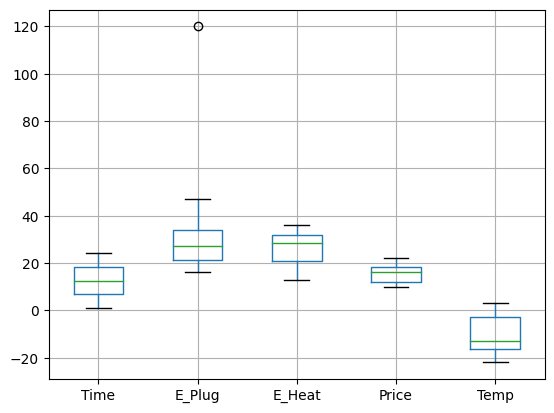

In [298]:
df8.boxplot()

In [299]:
# Probe that this datapoint is a potential outlier
Q1 = df8['E_Plug'].quantile(0.25)
Q1

21.25

In [300]:
Q3 = df8['E_Plug'].quantile(0.75)
Q3

33.75

In [302]:
IQR = Q3 - Q1
IQR

12.5

In [303]:
# Mild outlier
Mild_low = Q1 - 1.5*IQR
Mild_low

2.5

In [304]:
Mild_high = Q3 + 1.5*IQR
Mild_high

52.5

In [305]:
# Extreme outlier
Extreme_low = Q1 - 3*IQR
Extreme_low

-16.25

In [306]:
Extreme_high = Q3 + 3*IQR
Extreme_high

71.25

Thus, the datapoint in 120 for `E_Plug` is definitely a potential outlier & analyze why this values goes til that high value

- we can ask a technician why is there such a problem
- problems with the heaters?

It is necesary to deploy what I find in the real world

In [307]:
# Let's replace the outlier with another value

In [310]:
df8['E_Plug'].replace(120, 42, inplace=True)


In [312]:
df8.head(25)

,Time,E_Plug,E_Heat,Price,Temp
0,1,24.0,28,10.0,-15
1,2,17.0,32,12.0,-17
2,3,16.0,34,11.0,-19
3,4,16.0,33,12.0,-18
4,5,16.0,30,10.0,-14
5,6,16.0,31,10.0,-16
6,7,19.0,28,14.0,-14
7,8,22.0,29,12.0,-15
8,9,25.0,26,12.0,-12
9,10,26.0,24,14.0,-8


### Concatenation

In [316]:
new_path = working_dir+'/Data_New.csv'

In [317]:
new_col = pd.read_csv(new_path)

In [318]:
new_col.head(10)

,P/OffP
0,OffPeak
1,OffPeak
2,OffPeak
3,OffPeak
4,OffPeak
5,OffPeak
6,Peak
7,Peak
8,Peak
9,OffPeak


In [319]:
df11 = pd.concat([df8, new_col], axis=1)

In [320]:
df11.head(15)

,Time,E_Plug,E_Heat,Price,Temp,P/OffP
0,1,24.0,28,10.0,-15,OffPeak
1,2,17.0,32,12.0,-17,OffPeak
2,3,16.0,34,11.0,-19,OffPeak
3,4,16.0,33,12.0,-18,OffPeak
4,5,16.0,30,10.0,-14,OffPeak
5,6,16.0,31,10.0,-16,OffPeak
6,7,19.0,28,14.0,-14,Peak
7,8,22.0,29,12.0,-15,Peak
8,9,25.0,26,12.0,-12,Peak
9,10,26.0,24,14.0,-8,OffPeak


### Dummy Variables

In [322]:
df11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Time     24 non-null     int64  
 1   E_Plug   24 non-null     float64
 2   E_Heat   24 non-null     int64  
 3   Price    24 non-null     float64
 4   Temp     24 non-null     int64  
 5   P/OffP   24 non-null     object 
dtypes: float64(2), int64(3), object(1)
memory usage: 1.2+ KB


This process is called `dummy coding`

In [323]:
df12 = pd.get_dummies(df11)

In [324]:
df12.head(15)

,Time,E_Plug,E_Heat,Price,Temp,P/OffP _OffPeak,P/OffP _Peak
0,1,24.0,28,10.0,-15,1,0
1,2,17.0,32,12.0,-17,1,0
2,3,16.0,34,11.0,-19,1,0
3,4,16.0,33,12.0,-18,1,0
4,5,16.0,30,10.0,-14,1,0
5,6,16.0,31,10.0,-16,1,0
6,7,19.0,28,14.0,-14,0,1
7,8,22.0,29,12.0,-15,0,1
8,9,25.0,26,12.0,-12,0,1
9,10,26.0,24,14.0,-8,1,0


In [325]:
df12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Time             24 non-null     int64  
 1   E_Plug           24 non-null     float64
 2   E_Heat           24 non-null     int64  
 3   Price            24 non-null     float64
 4   Temp             24 non-null     int64  
 5   P/OffP _OffPeak  24 non-null     uint8  
 6   P/OffP _Peak     24 non-null     uint8  
dtypes: float64(2), int64(3), uint8(2)
memory usage: 1.1 KB


### Normalization

In [326]:
from sklearn.preprocessing import minmax_scale, normalize

In [327]:
# First method : minmaxscale
df12.head()

,Time,E_Plug,E_Heat,Price,Temp,P/OffP _OffPeak,P/OffP _Peak
0,1,24.0,28,10.0,-15,1,0
1,2,17.0,32,12.0,-17,1,0
2,3,16.0,34,11.0,-19,1,0
3,4,16.0,33,12.0,-18,1,0
4,5,16.0,30,10.0,-14,1,0


In [335]:
headers_norm = df12.columns
headers_norm

Index(['Time', 'E_Plug', 'E_Heat', 'Price', 'Temp', 'P/OffP _OffPeak',
       'P/OffP _Peak'],
      dtype='object')

In [336]:
df13 = pd.DataFrame(minmax_scale(df12, feature_range=(0,1)), columns=headers_norm)

In [337]:
df13

,Time,E_Plug,E_Heat,Price,Temp,P/OffP _OffPeak,P/OffP _Peak
0,0.000000,0.258065,0.652174,0.000000,0.28,1.0,0.0
1,0.043478,0.032258,0.826087,0.166667,0.20,1.0,0.0
2,0.086957,0.000000,0.913043,0.083333,0.12,1.0,0.0
3,0.130435,0.000000,0.869565,0.166667,0.16,1.0,0.0
4,0.173913,0.000000,0.739130,0.000000,0.32,1.0,0.0
5,0.217391,0.000000,0.782609,0.000000,0.24,1.0,0.0
6,0.260870,0.096774,0.652174,0.333333,0.32,0.0,1.0
7,0.304348,0.193548,0.695652,0.166667,0.28,0.0,1.0
8,0.347826,0.290323,0.565217,0.166667,0.40,0.0,1.0
9,0.391304,0.322581,0.478261,0.333333,0.56,1.0,0.0


In [341]:
# Second method -> normalize method
# axis = 0 -> normalize each feature/columns
# axis = 1 -> normalize each sample
# norm = 'l2' -> euclidean distance
# norm = 'l1' -> manhattan distance
df14 = pd.DataFrame(normalize(df12, norm='l2', axis=0), columns=headers_norm)

In [342]:
df14.head(15)

,Time,E_Plug,E_Heat,Price,Temp,P/OffP _OffPeak,P/OffP _Peak
0,0.014286,0.165094,0.207499,0.125958,-0.237706,0.25,0.000000
1,0.028571,0.116941,0.237141,0.151150,-0.269400,0.25,0.000000
2,0.042857,0.110063,0.251962,0.138554,-0.301095,0.25,0.000000
3,0.057143,0.110063,0.244552,0.151150,-0.285248,0.25,0.000000
4,0.071429,0.110063,0.222320,0.125958,-0.221859,0.25,0.000000
5,0.085714,0.110063,0.229730,0.125958,-0.253553,0.25,0.000000
6,0.100000,0.130699,0.207499,0.176341,-0.221859,0.00,0.353553
7,0.114286,0.151336,0.214909,0.151150,-0.237706,0.00,0.353553
8,0.128571,0.171973,0.192677,0.151150,-0.190165,0.00,0.353553
9,0.142857,0.178852,0.177856,0.176341,-0.126777,0.25,0.000000
